In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']= '/content/drive/MyDrive/kaggle'

In [ ]:
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
!kaggle datasets download -d chazzer/smiling-or-not-face-data

In [ ]:
%cp /content/drive/MyDrive/archive.zip .

In [ ]:
!unzip \*.zip && rm *.zip

**ALGORITHM 1**

Facial landmark detector


Draws a circle around each landmark

In [ ]:
    def renderfaciallandmarks(image, landmarks):
      points=[]

      [points.append((p.x, p.y)) for p in landmarks.parts()]   #converts landmarks into an iterable array

      for p in points:
        cv2.circle(image, (p[0], p[1]), 2, (255,0,0), -1)    #draw a circle around each landmark
      return image

Returns the coordinates of landmarks of every feature


In [ ]:
    def facelandmarks(image):
      detector=dlib.get_frontal_face_detector()  #create object to detect the face
      predictor=dlib.shape_predictor("/content/drive/MyDrive/kaggle/shape_predictor_68_face_landmarks (1).dat") #create object to detect facial landmarks
      rects=detector(image,0)                    #detect all the faces

      landmarksall=[]

      #For each face detected in the image, this creates an ROI around the face and pass it as an argument to the
      # predictor and append the result to the array landmarks
      for i in range (0, len(rects)):
        newrect=dlib.rectangle(rects[i].left(),rects[i].top(),rects[i].bottom(), rects[i].right())

        landmarks=predictor(image, newrect)
        landmarksall.append(landmarks)

      return landmarksall

Calculates MAR ratio and based on a threshold, classifies the image into smiling and non-smiling

In [ ]:
import os
import cv2
import dlib

def ratio(image):
    landmarks= facelandmarks(image)    #get landmarks

    if landmarks:
        facewithlandmarks= renderfaciallandmarks(image, landmarks[0])   #render the landmarks on the first face detected

        lipswidth=abs( landmarks[0].parts()[49].x-landmarks[0].parts()[55].x)
        jawwidth= abs( landmarks[0].parts()[3].x-landmarks[0].parts()[15].x)

        ratio=lipswidth/jawwidth
    else:
        ratio = 0
    return (ratio)

def algorithm1():
    path1='/content/drive/MyDrive/kaggle/smile'
    path2='/content/drive/MyDrive/kaggle/non_smile'
    smile=0
    no_smile=0

    for img in os.listdir(path1)[:20]:
        image=cv2.imread(path1 +'/'+ img)              #read image into a variable
        mar=ratio(image)

        if (mar>0.32):
          #print(mar)
          result="smile"
          smile+=1

    for img in os.listdir(path2)[:20]:
          image=cv2.imread(path2 +'/'+ img)
          mar=ratio(image)

          if (mar <0.32):
            result="no smile"
            no_smile+=1

    accuracy= (smile + no_smile)/40
    print(accuracy)
algorithm1()

0.825


Following code prints the images with landmarks

4 images are printed out of 5 as the landmarks of one image is not detected

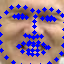

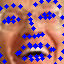

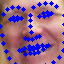

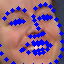

In [ ]:
from google.colab.patches import cv2_imshow
import os
path1='/content/drive/MyDrive/kaggle/smile'
img_list=[]
img=os.listdir(path1)
for image in img:
  imgpath=path1+'/'+image
  img_list.append(cv2.imread(imgpath))

for i in range(5):
  landmarks = facelandmarks(img_list[i])
  if len(landmarks)>0:
      img = renderfaciallandmarks(img_list[i], landmarks[0])
      cv2_imshow(img)

**ALGORITHM 2**

Haar Cascading

No output is shown as model is not able to read xml files uploaded

In [ ]:
import cv2
import os
def algorithm2():
  smile=0
  no_smile=0

  facecascade=cv2.CascadeClassifier("/content/drive/MyDrive/kaggle/haarcascade_frontalface_default.xml")
  smilecascade=cv2.CascadeClassifier("/content/drive/MyDrive/kaggle/haarcascade_smile.xml")

  path1='/content/drive/MyDrive/kaggle/smile'
  path2='/content/drive/MyDrive/kaggle/non_smile'
  for img in os.listdir(path1):
      image=cv2.imread(path1 +'/'+ img)
      print(image)           #read image into a variable
      gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #convert into grayscale
      faces=facecascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30,30))

      for(x,y,w,h) in faces:
        cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)        #draw  rectangle around face

        roi_gray=gray[y:y+h, x:x+w]

        smiles=smilecascade.detectMultiScale(roi_gray, scaleFactor=1.5, minNeighbors=15, minSize=(25,25))

        if smiles:
          smile+=1
          for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(image, (sx,sy),(sx+sw, sy+sh), (0,255,0), 2)
            print("smile")
            cv2.putText(image, "smiling", (x, y-30), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3, cv2.LINE_AA)

        else:
          no_smile+=1

  for img in os.listdir(path2):
      image=cv2.imread(path2 +'/'+ img)
      print(image)           #read image into a variable
      gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  #convert into grayscale
      faces=facecascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30,30))

      for(x,y,w,h) in faces:
        cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)        #draw  rectangle around face

        roi_gray=gray[y:y+h, x:x+w]

        smiles=smilecascade.detectMultiScale(roi_gray, scaleFactor=1.5, minNeighbors=15, minSize=(25,25))

        if smiles:
          smile+=1
          for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(image, (sx,sy),(sx+sw, sy+sh), (0,255,0), 2)
            print("smile")
            cv2.putText(image, "smiling", (x, y-30), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3, cv2.LINE_AA)

        else:
          no_smile+=1

  accuracy=(smile+no_smile)/(len(os.listdir(path1))+ len(os.listdir(path2)))
  print(accuracy)

algorithm2()

**ALGORITHM 3**

CNN

Dataset is divided into training and validation set

In [ ]:
import os
import cv2
import numpy as np
import torch



train_img=[]
label=[]

path1='/content/drive/MyDrive/kaggle/smile'
path2='/content/drive/MyDrive/kaggle/non_smile'

for img_name in os.listdir(path1):

  img=cv2.imread(path1 + '/'+img_name)
  train_img.append(img)
  label.append(1)

for img_name in os.listdir(path2):

  img=cv2.imread(path2 + '/'+img_name)
  train_img.append(img)
  label.append(0)

train_x=np.array(train_img, dtype=np.float32)
print(train_x.shape)
train_x = train_x.transpose(0, 3, 1, 2)
train_y=np.array(label)
print(train_x.shape)

from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y= train_test_split(train_x, train_y, test_size=0.1)

print(train_x.shape, train_y.shape)

train_x=torch.from_numpy(train_x)

train_y=torch.from_numpy(train_y)
print(train_x.shape, train_y.shape)

val_x=torch.from_numpy(val_x)

val_y=torch.from_numpy(val_y)

print(val_x.shape, val_y.shape)

(1203, 64, 64, 3)
(1203, 3, 64, 64)
(1082, 3, 64, 64) (1082,)
torch.Size([1082, 3, 64, 64]) torch.Size([1082])
torch.Size([121, 3, 64, 64]) torch.Size([121])


Model architecture is defined- with 4 convolutional layers

In [ ]:

from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d,Dropout, BatchNorm1d
class Net(Module):
  def __init__(self):
    super(Net,self).__init__()

    self.cnn_layers= Sequential( Conv2d(3,4,kernel_size=3, stride=1, padding=1),
                                BatchNorm2d(4),
                                ReLU(inplace=True),
                                MaxPool2d(kernel_size=2, stride=2),

                                Conv2d(4,4,kernel_size=3, stride=1, padding=1),
                                BatchNorm2d(4),
                                ReLU(inplace=True),
                                MaxPool2d(kernel_size=2, stride=2),

                                Conv2d(4,6,kernel_size=3, stride=1, padding=1),
                                BatchNorm2d(6),
                                ReLU(inplace=True),
                                MaxPool2d(kernel_size=2, stride=2),

                                Conv2d(6,6,kernel_size=3, stride=1, padding=1),
                                BatchNorm2d(6),
                                ReLU(inplace=True),
                                MaxPool2d(kernel_size=2, stride=2))

    self.linear_layers=Sequential(
        Linear(4*4*6, 16),
        BatchNorm1d(16),
        ReLU(inplace = True),
        Linear(16,2)
    )

  def forward(self, x):
      x=self.cnn_layers(x)
      x=x.reshape(x.size(0),-1)
      x=self.linear_layers(x)
      return x


Model is optimized

In [ ]:
from torch.optim import Adam
model=Net()
optimizer=Adam(model.parameters(), lr=1e-3)
criterion=CrossEntropyLoss()

if torch.cuda.is_available():
  model=model.cuda()
  criterion=criterion.cuda()

print(model)


Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(4, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(6, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_run

Model is trained and validation losses are printed


In [ ]:
from torch.autograd import Variable
def train(epoch):
  model.train()
  tr_loss=0
  x_train, y_train=Variable(train_x), Variable(train_y)
  x_val, y_val=Variable(val_x), Variable(val_y)

  if torch.cuda.is_available():
    x_train=x_train.cuda()
    y_train=y_train.cuda()
    x_val=x_val.cuda()
    y_val=y_val.cuda()

  optimizer.zero_grad()
  output_train=model(x_train)
  output_val=model(x_val)

  loss_train=criterion(output_train, y_train)
  loss_val=criterion(output_val, y_val)

  train_losses.append(loss_train.item())
  val_losses.append(loss_val.item())

  loss_train.backward()
  optimizer.step()

  if epoch%10==0:
    print('epoch:', epoch+1, '\t', 'loss:', loss_val.item())

train_losses=[]
val_losses=[]
n_epochs=500
for epoch in range(n_epochs):
  train(epoch)

epoch: 1 	 loss: 0.22568652033805847
epoch: 11 	 loss: 0.22572927176952362
epoch: 21 	 loss: 0.226619154214859
epoch: 31 	 loss: 0.22673699259757996
epoch: 41 	 loss: 0.22599636018276215
epoch: 51 	 loss: 0.22645176947116852
epoch: 61 	 loss: 0.22687740623950958
epoch: 71 	 loss: 0.2279035598039627
epoch: 81 	 loss: 0.22786156833171844
epoch: 91 	 loss: 0.22814996540546417
epoch: 101 	 loss: 0.22842787206172943
epoch: 111 	 loss: 0.22855739295482635
epoch: 121 	 loss: 0.22936150431632996
epoch: 131 	 loss: 0.2297213226556778
epoch: 141 	 loss: 0.23030155897140503
epoch: 151 	 loss: 0.23036278784275055
epoch: 161 	 loss: 0.2310149073600769
epoch: 171 	 loss: 0.23208056390285492
epoch: 181 	 loss: 0.2329530566930771
epoch: 191 	 loss: 0.23412638902664185
epoch: 201 	 loss: 0.23577050864696503
epoch: 211 	 loss: 0.23740150034427643
epoch: 221 	 loss: 0.23889657855033875
epoch: 231 	 loss: 0.2397952675819397
epoch: 241 	 loss: 0.24123525619506836
epoch: 251 	 loss: 0.24204300343990326
epoc

A visual plot of validation and training losses


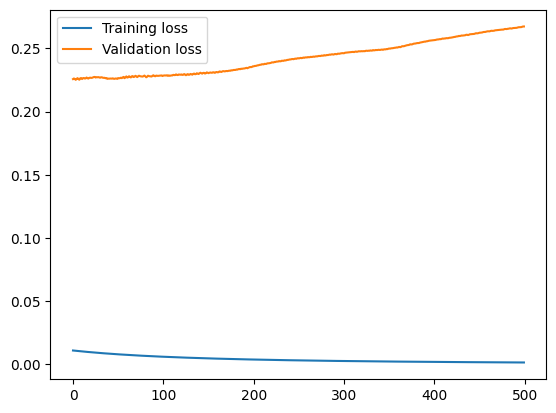

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

Accuracy of training set


In [ ]:
from sklearn.metrics import accuracy_score
with torch.no_grad():
  output= model(train_x.cuda())

softmax=torch.exp(output).cpu()
prob=list(softmax.numpy())
predictions=np.argmax(prob, axis=1)

acc=accuracy_score(train_y, predictions)
print(acc)

1.0


Accuracy of validation set

In [ ]:
with torch.no_grad():
  output=model(val_x.cuda())

softmax=torch.exp(output).cpu()
prob=list(softmax.numpy())
predictions=np.argmax(prob, axis=1)

val_acc=accuracy_score(val_y, predictions)
print(val_acc)

0.8842975206611571
